In [1]:
#Load Image, View, Save - OpenCV, PIL
import cv2
import numpy as np
image = cv2.imread('images/chicago.jpg', 1)
cv2.imshow('image',image)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('images/exam.jpg',image)

True

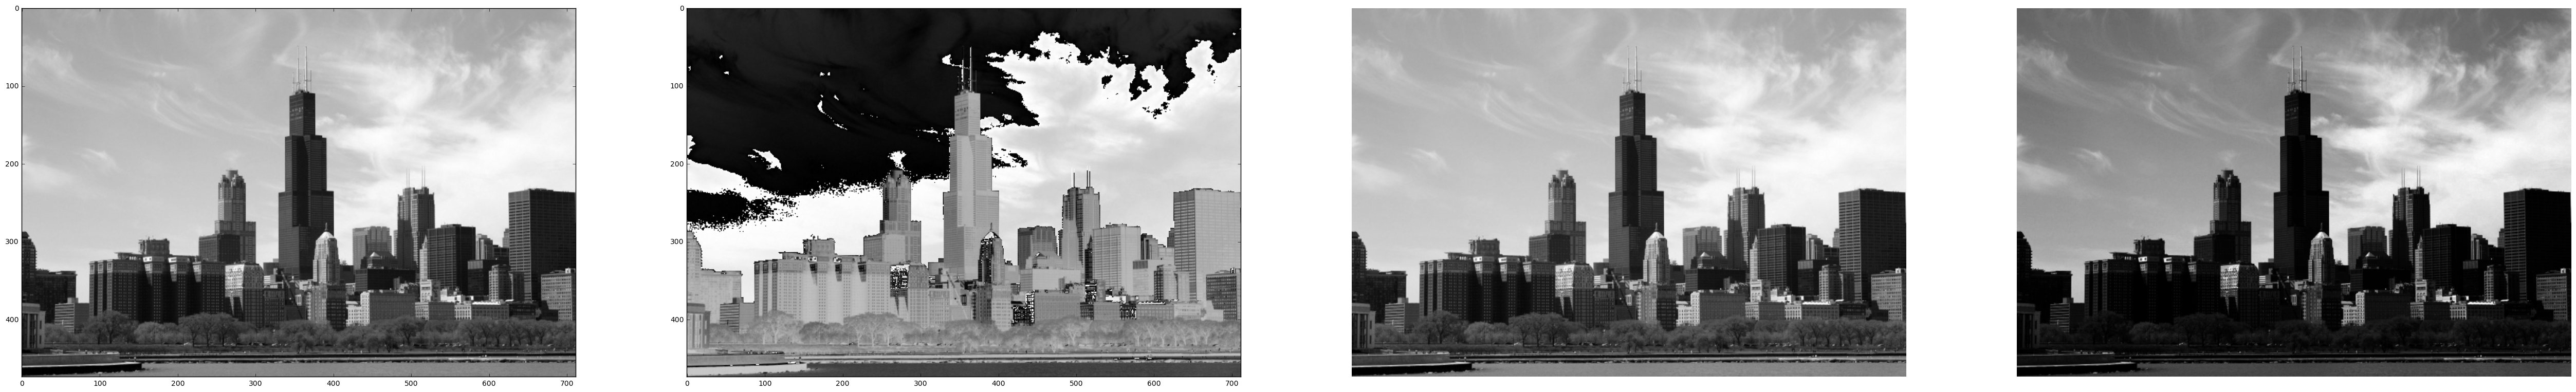

In [14]:
#Histogram Iqualization
from PIL import Image
from pylab import *
ht = array(Image.open('images\chicago.jpg').convert('L'))
ht2 = 200 - ht #invert image
ht3 = (100.0/200) * ht + 100 #clamp to interval 100...200
ht4 = 255.0 * (ht/200.0)**2 #squared
fig, axs = subplots(1, 4, figsize=(64, 64))
axs[0].imshow(ht)
axs[0].axis('on')
axs[1].imshow(ht2)
axs[1].axis('on')
axs[2].imshow(ht3)
axs[2].axis('off')
axs[3].imshow(ht4)
axs[3].axis('off')

gray()
show()

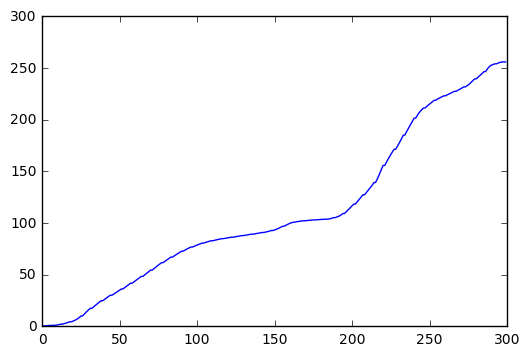

In [9]:
def histeq(ht,nbr_bins=300):
    """ Histogram equalization of a grayscale image. """
    
    # get image histogram
    imhist,bins = histogram(ht.flatten(),nbr_bins,normed=True)
    cdf = imhist.cumsum() # cumulative distribution function
    cdf = 256 * cdf / cdf[-1] # normalize
    # use linear interpolation of cdf to find new pixel values
    ht2 = interp(ht.flatten(),bins[:-1],cdf)
    return ht2.reshape(ht.shape), cdf

ht2,cdf = histeq(ht)
figure()
plot(cdf)
show()

In [10]:
#Image Convolution - Average, Laplacian
def compute_average(imlist):
    """ Compute the average of a list of images. """
    # open first image and make into array of type float
    averageim = array(Image.open(imlist[0]), 'f')
    for imname in imlist[1:]:
        try:
            averageim += array(Image.open(imname))
        except:
            print(imname + '...skipped')
    averageim /= len(imlist)
    # return average as uint8
    return array(averageim, 'uint8')

In [15]:
import numpy as np

planets = cv2.imread('images/chicago.jpg')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, 5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("planets_circles.jpg", planets)
cv2.imshow("HoughCirlces", planets)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('images/chicago.jpg')

kernal = np.array([[1/6,1/6,1/6],[1/6,1/6,0/6],[1/6,1/6,1/6]])

average = np.zeros((img.shape[0],img.shape[1],3), 'uint8')

print(average.shape)

cv2.imshow("org",img)

for i in range(1,log.shape[0]-1):
    for j in range(1,log.shape[1]-1):
        for k in range(0,2):
            for l in range(0,2):
                average[i,j,0] += int(img[i,j,0] * kernal[k][l])
                average[i,j,1] += int(img[i,j,1] * kernal[k][l])
                average[i,j,2] += int(img[i,j,2] * kernal[k][l])

cv2.imshow("Convolution_average",average)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
kernal_laplacian = np.array([[1,1,1],[1,-8,1],[1,1,1]])
kernal_laplacian2 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplacian  = np.zeros((img.shape[0],img.shape[1],3), 'uint8')

print(average.shape)


for i in range(1,laplacian.shape[0]-1):
    for j in range(1,laplacian.shape[1]-1):
        for k in range(0,2):
            for l in range(0,2):
                laplacian[i,j,0] += int(img[i+k-1,j+l-1,0] * kernal_laplacian[k][l])
                laplacian[i,j,1] += int(img[i+k-1,j+l-1,1] * kernal_laplacian[k][l])
                laplacian[i,j,2] += int(img[i+k-1,j+l-1,2] * kernal_laplacian[k][l])

cv2.imshow("Convolution_laplacian",laplacian)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
def bubble_sort(random_list):    
    for start_index in range( len(random_list)-1 ):
        for index in range( 1, len(random_list) - start_index ):
            if random_list[index-1] > random_list[index]:
                temp = random_list[index-1]
                random_list[index-1] = random_list[index]
                random_list[index] = temp
                
    return random_list[int(len(random_list)/2)]

median  = np.zeros((img.shape[0],img.shape[1],3), 'uint8')

median_array = np.zeros((3,9), 'uint8')

for i in range(1,median.shape[0]-1):
    for j in range(1,median.shape[1]-1):
        cnt = 0
        for k in range(0,3):
            for l in range(0,3):
                median_array[0,cnt]=img[i+k-1,j+l-1,0]
                median_array[1,cnt]=img[i+k-1,j+l-1,1]
                median_array[2,cnt]=img[i+k-1,j+l-1,2]
                cnt = cnt+1
                      
        median[i,j,0] = bubble_sort(median_array[0])
        median[i,j,1] = bubble_sort(median_array[1])
        median[i,j,2] = bubble_sort(median_array[2])

cv2.imshow("Convolution_median",median)

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
def bubble_sort_Max(random_list):    
    for start_index in range( len(random_list)-1 ):
        for index in range( 1, len(random_list) - start_index ):
            if random_list[index-1] > random_list[index]:
                temp = random_list[index-1]
                random_list[index-1] = random_list[index]
                random_list[index] = temp
                
    return random_list[len(random_list)-2]

Max_img  = np.zeros((img.shape[0],img.shape[1],3), 'uint8')

Max_array = np.zeros((3,9), 'uint8')

cv2.imshow("org",img)
cnt = 0
for i in range(1,Max.shape[0]-1):
    for j in range(1,Max.shape[1]-1):
        cnt = 0
        for k in range(0,3):
            for l in range(0,3):
                Max_array[0,cnt]=img[i+k-1,j+l-1,0]
                Max_array[1,cnt]=img[i+k-1,j+l-1,1]
                Max_array[2,cnt]=img[i+k-1,j+l-1,2]
                cnt = cnt+1
                      
        Max_img[i,j,0] = bubble_sort_Max(Max_array[0])
        Max_img[i,j,1] = bubble_sort_Max(Max_array[1])
        Max_img[i,j,2] = bubble_sort_Max(Max_array[2])

cv2.imshow("Convolution_Max",Max_img)

cv2.waitKey() 
cv2.destroyAllWindows()

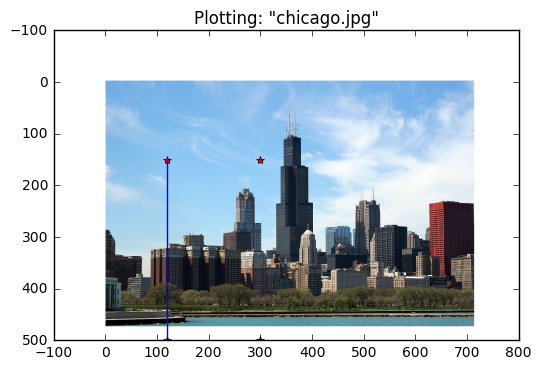

In [12]:
from PIL import Image
from pylab import *
# import matplotlib.pyplot as pl
# read image to array
im = array(Image.open('images/chicago.jpg'))
# plot the image
imshow(im)
# some points
m = [120,120,300,300]
n = [150,500,150,500]
# plot the points with red star-markers
plot(m,n,'r*')
# line plot connecting the first two points
plot(m[:2],n[:2])
# add title and show the plot
title('Plotting: "chicago.jpg"')
show()


In [ ]:
def bubble_sort_Min(random_list):    
    for start_index in range( len(random_list)-1 ):
        for index in range( 1, len(random_list) - start_index ):
            if random_list[index-1] > random_list[index]:
                temp = random_list[index-1]
                random_list[index-1] = random_list[index]
                random_list[index] = temp
                
    return random_list[0]

Min  = np.zeros((img.shape[0],img.shape[1],3), 'uint8')

Min_array = np.zeros((3,9), 'uint8')

for i in range(1,Min.shape[0]-1):
    for j in range(1,Min.shape[1]-1):
        cnt = 0
        for k in range(0,3):
            for l in range(0,3):
                Min_array[0,cnt]=img[i+k-1,j+l-1,0]
                Min_array[1,cnt]=img[i+k-1,j+l-1,1]
                Min_array[2,cnt]=img[i+k-1,j+l-1,2]
                cnt = cnt+1
                      
        Min[i,j,0] = bubble_sort_Min(Min_array[0])
        Min[i,j,1] = bubble_sort_Min(Min_array[1])
        Min[i,j,2] = bubble_sort_Min(Min_array[2])

cv2.imshow("Convolution_Min",Min)

cv2.waitKey()
cv2.destroyAllWindows()